# Understanding Descriptive Statistics

Import the necessary libraries here:

In [121]:
import matplotlib
import numpy as np
import pandas as pd
import random
import math
import statistics
import collections
import matplotlib.pyplot as plt
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [48]:
lst=[]
def dice_sim(x):
    x = [random.randint(1,6) for _ in range(10)]
    return x
lst = dice_sim(lst)
print(lst)

[6, 2, 1, 1, 5, 1, 3, 3, 5, 2]


In [49]:
#alternatively
"""dice_num = 10
def dice_roll(dice_num):
    dice_lst = []
    for x in range(dice_num):
        dice_lst.append(random.randint(1, 6))
    return dice_lst
dice_roll(10)"""

'dice_num = 10\ndef dice_roll(dice_num):\n    dice_lst = []\n    for x in range(dice_num):\n        dice_lst.append(random.randint(1, 6))\n    return dice_lst\ndice_roll(10)'

#### 2.- Plot the results sorted by value.

In [65]:
lst.sort()
print(lst)

dice = { i : lst.count(i) for i in range(1, 6+1) }
print(dice)
dice_df = pd.DataFrame.from_dict(dice, orient="index")
dice_df

lst
lst_df = pd.DataFrame(lst)
lst_df

[1, 1, 1, 2, 2, 3, 3, 5, 5, 6]
{1: 3, 2: 2, 3: 2, 4: 0, 5: 2, 6: 1}


,0
0,1
1,1
2,1
3,2
4,2
5,3
6,3
7,5
8,5
9,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [52]:
#create a dictionary and read stuff into it

dice = { i : lst.count(i) for i in range(1, 6+1) }
print(dice)

#works as well but have timport stuff first: counter=collections.Counter(res1)      print(counter)
"""dice = {}
for x in range(1,6):
    roll = random.randint(1, sides)
    dice[lst] = dice.get(lst, 0) + 1
"""
"""dataframe = lst.pd()
lst.hist()
"""

{1: 3, 2: 2, 3: 2, 4: 0, 5: 2, 6: 1}


'dataframe = lst.pd()\nlst.hist()\n'

   0
1  3
2  2
3  2
4  0
5  2
6  1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124201f90>]],
      dtype=object)

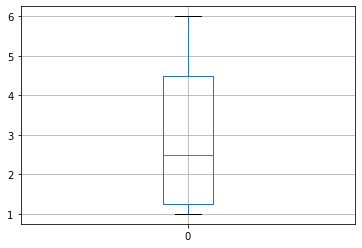

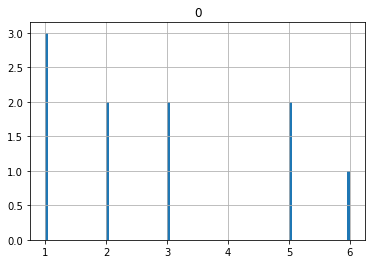

In [66]:
import matplotlib
%matplotlib inline

dice_df = pd.DataFrame.from_dict(dice, orient="index")
print(dice_df)

lst_df.boxplot()
lst_df.hist(bins=100)

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [44]:
def mymean(rolls):
    return sum(rolls)/len(rolls)
print(mymean(lst))


"""def mean(df):
    mean = (df.sum())/(len(df))
    return mean
print(mean(dice_df))
"""
'''
def mean(df):
    mean = df.mean()
    return mean
mean(dice_df)
'''

3.4


'\ndef mean(df):\n    mean = df.mean()\n    return mean\nmean(dice_df)\n'

In [45]:
sum(lst)

34

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [31]:
counter=collections.Counter(lst)      
print(counter)

Counter({1: 2, 3: 2, 4: 2, 5: 2, 2: 1, 6: 1})


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [75]:
def median(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
print(lst)
median(lst)

[1, 1, 1, 2, 2, 3, 3, 5, 5, 6]


2.5

In [148]:
#alternative that is easier to understand
def median2(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2 #cause the fourth is the fith! --> as  we are talking about indexes!
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0
print(lst)
median2(lst)

[1, 1, 1, 2, 2, 3, 3, 5, 5, 6]


2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [179]:
#it works!!!
def median(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
print(lst)
print("median",median(lst))
median_of_lst = math.ceil(median(lst))

sub_lst_lower50 = []
for i in range (0, math.ceil(len(lst)/2)):
    sub_lst_lower50.append(lst[i])
del sub_lst_lower50[-1]
sub_lst_lower50.append(median(lst))
print(sub_lst_lower50)

def quartile_25(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
print(lst)
print("25%", quartile_25(sub_lst_lower50))

sub_lst_upper50 = []
for i in range (round(len(lst)/2), len(lst)-1):
    sub_lst_upper50.append(lst[i])
print(sub_lst_upper50)

def quartile_75(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
print(lst)
print("75%", quartile_75(sub_lst_upper50))

#for i in range (1, median_of_lst+1):

[1, 1, 1, 2, 2, 3, 3, 5, 5, 6]
median 2.5
[1, 1, 1, 2, 2.5]
[1, 1, 1, 2, 2, 3, 3, 5, 5, 6]
25% 1
[3, 3, 5, 5]
[1, 1, 1, 2, 2, 3, 3, 5, 5, 6]
75% 4.0


In [180]:
"""
def median(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
print(lst)
median(lst)
median_of_lst = math.ceil(median(lst))
print(median_of_lst)

sub_lst_lower50 = []
for i in lst:
    if 1<=i<=(median_of_lst):
        sub_lst_lower50.append(i)
print(sub_lst_lower50)

#for i in range (1, median_of_lst+1):
"""

'\ndef median(x):\n    n = len(x)\n    s = sorted(x)\n    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None\nprint(lst)\nmedian(lst)\nmedian_of_lst = math.ceil(median(lst))\nprint(median_of_lst)\n\nsub_lst_lower50 = []\nfor i in lst:\n    if 1<=i<=(median_of_lst):\n        sub_lst_lower50.append(i)\nprint(sub_lst_lower50)\n\n#for i in range (1, median_of_lst+1):\n'

In [181]:
"""
#how to change this one?
def quartile(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//4-1:n//4+1])/2.0, s[n//4])[n % 2] if n else None
quartile(lst)
"""

'\n#how to change this one?\ndef quartile(x):\n    n = len(x)\n    s = sorted(x)\n    return (sum(s[n//4-1:n//4+1])/2.0, s[n//4])[n % 2] if n else None\nquartile(lst)\n'

In [182]:
"""#alternative that is easier to understand
def quartile25(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen -1) // 4
    if (lstLen % 4):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/4.0
print(lst)
quartile25(lst)
"""

'#alternative that is easier to understand\ndef quartile25(lst):\n    sortedLst = sorted(lst)\n    lstLen = len(lst)\n    index = (lstLen -1) // 4\n    if (lstLen % 4):\n        return sortedLst[index]\n    else:\n        return (sortedLst[index] + sortedLst[index + 1])/4.0\nprint(lst)\nquartile25(lst)\n'

In [183]:
"""#alternative that is easier to understand
def quartile75(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen -1) // 4
    if (lstLen % 4):
        return sortedLst[index+1] *2.5
    else:
        return (sortedLst[index] + sortedLst[index + 1])/4.0 * 3
print(lst)
quartile75(lst)
"""

'#alternative that is easier to understand\ndef quartile75(lst):\n    sortedLst = sorted(lst)\n    lstLen = len(lst)\n    index = (lstLen -1) // 4\n    if (lstLen % 4):\n        return sortedLst[index+1] *2.5\n    else:\n        return (sortedLst[index] + sortedLst[index + 1])/4.0 * 3\nprint(lst)\nquartile75(lst)\n'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [236]:
data = pd.read_csv("../data/roll_the_dice_hundred.csv", index_col="roll")
print(data.columns)
data = data.drop(columns=["Unnamed: 0"], axis=1)
data

lst=list(data["value"])
print(lst)

Index(['Unnamed: 0', 'value'], dtype='object')
[1, 2, 6, 1, 6, 5, 2, 2, 4, 1, 5, 6, 5, 4, 5, 4, 4, 6, 2, 4, 4, 6, 3, 6, 6, 4, 1, 4, 4, 2, 6, 5, 5, 2, 3, 6, 6, 2, 3, 6, 6, 2, 5, 3, 4, 6, 2, 1, 4, 2, 3, 2, 2, 4, 6, 2, 1, 3, 2, 4, 4, 3, 4, 1, 3, 6, 3, 4, 4, 4, 2, 2, 5, 1, 5, 6, 2, 4, 6, 5, 6, 4, 1, 3, 3, 3, 5, 6, 5, 1, 6, 3, 6, 4, 1, 4, 6, 1, 3, 6]


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [227]:
def mymean(rolls):
    return sum(rolls)/len(rolls)
print(mymean(lst))

3.74


#### 3.- Now, calculate the frequency distribution.


In [231]:
dice2 = { i : lst.count(i) for i in range(1, 6+1) }
print(dice2)

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}


'\ndice2_df = pd.DataFrame.from_dict(lst, orient="index")\ndice2_df\n'

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1246079d0>]],
      dtype=object)

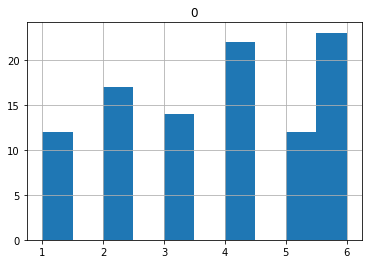

In [239]:
lst_df = pd.DataFrame(lst)
lst_df
lst_df.hist()

In [ ]:
"""dice2 = pd.DataFrame.from_dict(dice2, orient="index")
dice2.hist()"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

Index(['value'], dtype='object')
{1: 175, 2: 167, 3: 175, 4: 168, 5: 149, 6: 166}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124a15b10>]],
      dtype=object)

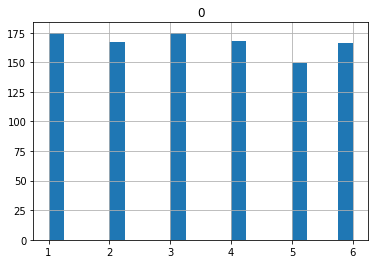

In [259]:
data_1000 = pd.read_csv("../data/roll_the_dice_thousand.csv", index_col="roll")
print(data.columns)
data_1000 = data_1000.drop(columns=["Unnamed: 0"], axis=1)
data_1000

lst=list(data_1000["value"])
#print(lst)
dice_1000 = { i : lst.count(i) for i in range(1, 6+1) }
print(dice_1000)

lst_df = pd.DataFrame(lst)
lst_df
lst_df.hist(bins=20)

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [253]:
data_ages = pd.read_csv("../data/ages_population.csv")
data_ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124b4fb90>]],
      dtype=object)

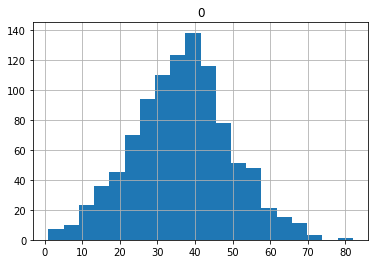

In [272]:
lst=list(data_ages["observation"])
#print(lst)
lst_df = pd.DataFrame(lst)
lst_df
lst_df.hist(bins=20)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [273]:
lst_df.mean()

0    36.56
dtype: float64

In [274]:
lst_df.std()

0    12.8165
dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124d4e590>]],
      dtype=object)

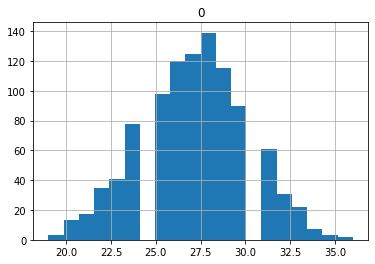

In [265]:
data_ages2 = pd.read_csv("../data/ages_population2.csv")
data_ages2
lst=list(data_ages2["observation"])
#print(lst)
lst_df = pd.DataFrame(lst)
lst_df
lst_df.hist(bins=20)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
'interestingly some ages seem to be missing'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [267]:
lst_df.mean()

0    27.155
dtype: float64

In [269]:
lst_df.std()

0    2.969814
dtype: float64

In [ ]:
"""
while the different mean can most likley be explained by gaps that we see 
for some ages, the standard deviation is astonishingly low in step 5
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125347b90>]],
      dtype=object)

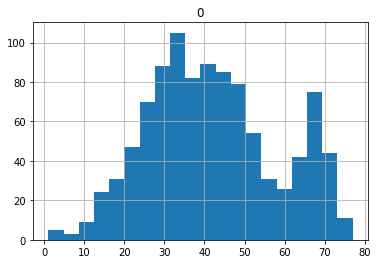

In [285]:
data_ages3 = pd.read_csv("../data/ages_population3.csv")
data_ages3
lst=list(data_ages3["observation"])
#print(lst)
lst_df = pd.DataFrame(lst)
lst_df
lst_df.hist(bins=20)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [277]:
lst_df.mean()

0    41.989
dtype: float64

In [283]:
lst_df.std()

0    16.144706
dtype: float64

In [284]:
lst_df.describe()

,0
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
both the standard deviation and the mean are remarkably high
--> probably this is due to the massive amount of peiople being around the age of 67/68
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [294]:
lst =sorted(lst)

def median(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
#print(lst)
print("median",median(lst))
median_of_lst = math.ceil(median(lst))

sub_lst_lower50 = []
for i in range (0, math.ceil(len(lst)/2)):
    sub_lst_lower50.append(lst[i])
del sub_lst_lower50[-1]
sub_lst_lower50.append(median(lst))
#print(sub_lst_lower50)

def quartile_25(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
#print(lst)
print("25%", quartile_25(sub_lst_lower50))

sub_lst_upper50 = []
for i in range (round(len(lst)/2), len(lst)-1):
    sub_lst_upper50.append(lst[i])
#print(sub_lst_upper50)

def quartile_75(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
#print(lst)
print("75%", quartile_75(sub_lst_upper50))



median 40.0
25% 30.0
75% 53.0


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [296]:
#12.5%

sub_lst_lower25 = []
for i in range (0, math.ceil(len(lst)/4)):
    sub_lst_lower25.append(lst[i])
del sub_lst_lower25[-1]
sub_lst_lower25.append(median(lst))
#print(sub_lst_lower50)

def quartile_12point5(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
#print(lst)
print("12.5%:", quartile_12point5(sub_lst_lower25))

12.5%: 24.0


In [298]:
#87.5%

#round(len(lst)/2), len(lst)-1
sub_lst_upper25 = []
for i in range (math.ceil((len(lst)/4)*3), len(lst)-1):
    sub_lst_upper25.append(lst[i])
del sub_lst_upper25[-1]
sub_lst_upper25.append(median(lst))
#print(sub_lst_lower50)

def quartile_87point5(x):
    n = len(x)
    s = sorted(x)
    return (sum(s[n//2-1:n//2+1])/2.0, s[n//2])[n % 2] if n else None
#print(lst)
print("87.5%:", quartile_87point5(sub_lst_upper25))

87.5%: 66.0
